In [1]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 192))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 723.98it/s]
Reading metadata...: 1013968it [00:25, 40343.26it/s]
Reading metadata...: 7071it [00:00, 21961.89it/s]
Reading metadata...: 540437it [00:11, 46170.53it/s]
Reading metadata...: 105it [00:00, 422.07it/s]
Reading metadata...: 16372it [00:00, 44540.61it/s]
Reading metadata...: 4961it [00:00, 17348.57it/s]
Reading metadata...: 16143it [00:00, 44078.68it/s]
Reading metadata...: 131it [00:00, 504.17it/s]
Reading metadata...: 16372it [00:00, 41588.90it/s]
Reading metadata...: 4961it [00:00, 17277.51it/s]
Reading metadata...: 16143it [00:00, 43429.29it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-base"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/792 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_base_lr2",
    per_device_train_batch_size=8,
    learning_rate=3e-5,
    num_train_epochs=5,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-32d8fb90c4bc>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,7.835400
20,5.331800
30,4.750600
40,4.621800
50,4.512200
60,4.387000
70,4.265600
80,4.170100
90,4.175300
100,4.121000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=495, training_loss=2.8220709598425664, metrics={'train_runtime': 561.9918, 'train_samples_per_second': 7.046, 'train_steps_per_second': 0.881, 'total_flos': 2.568455847936e+17, 'train_loss': 2.8220709598425664, 'epoch': 5.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_base_lr2"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:00<01:06,  1.48it/s]

🔹 Predicted:  So, the first and most widely used product is gold.
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:00<00:40,  2.40it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:01<00:34,  2.77it/s]

🔹 Predicted:  So, the reason I decided to do this is because I decided to make a new album and listen to it.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:01<00:34,  2.77it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him in the same place as the first time in the game.)
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라
🔹 Predicted:  ( )
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:01<00:24,  3.81it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:02<00:23,  4.04it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  9%|▉         | 9/100 [00:02<00:26,  3.48it/s]

🔹 Predicted:  So, the reason why I decided to make this was because I needed to make the first and most importantly, make the most of the most of the time, however, was because I needed to make the most of the time.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.
🔹 Predicted:  Chiming is a popular among other people in the United States.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:03<00:24,  3.69it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:03<00:22,  3.98it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:03<00:22,  3.99it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local drugstore in Japan.
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:03<00:21,  4.11it/s]

🔹 Predicted:  ( "Wild-October" by Robert B. Kennedy)
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:03<00:20,  4.20it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:04<00:22,  3.71it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born)
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 17%|█▋        | 17/100 [00:04<00:17,  4.66it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.
🔹 Predicted:  Let's see what happens.
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:04<00:14,  5.52it/s]

🔹 Predicted:  (upbeat music)
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 20%|██        | 20/100 [00:09<01:23,  1.04s/it]

🔹 Predicted:  Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choochoo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo! Choo
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.
🔹 Predicted:  (upbeat music)
🔸 Reference: 게으른 자는 말하기를 

 21%|██        | 21/100 [00:09<01:00,  1.32it/s]

🔹 Predicted:  Oh, my God.
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:09<00:46,  1.66it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:09<00:38,  1.99it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore drugstore.
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:10<00:34,  2.22it/s]

🔹 Predicted:  So, the reason why I decided to make this was because I needed to make a little change in the process of making the process.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:10<00:28,  2.64it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:10<00:25,  2.87it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore drugstore.
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.
🔹 Predicted:  ( )
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:10<00:17,  4.00it/s]

🔹 Predicted:  So, the first and most widely used product is gold.
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 31%|███       | 31/100 [00:11<00:12,  5.46it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.
🔹 Predicted:  [ ]
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니
🔹 Predicted:  [ ]
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 33%|███▎      | 33/100 [00:11<00:09,  6.75it/s]

🔹 Predicted:  [ ]
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.
🔹 Predicted:  [ ]
🔸 Reference: 스스로가 형편없다고 생각하지 말라.
🔹 Predicted:  [ ]
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 37%|███▋      | 37/100 [00:11<00:07,  8.72it/s]

🔹 Predicted:  [ ]
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.
🔹 Predicted:  [ ]
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.
🔹 Predicted:  [ ]
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 39%|███▉      | 39/100 [00:12<00:06,  9.47it/s]

🔹 Predicted:  [ ]
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.
🔹 Predicted:  [ ]
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.
🔹 Predicted:  ( )
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 43%|████▎     | 43/100 [00:12<00:05, 10.43it/s]

🔹 Predicted:  [ ]
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에
🔹 Predicted:  [ ]
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라
🔹 Predicted:  [ ]
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 45%|████▌     | 45/100 [00:12<00:05, 10.68it/s]

🔹 Predicted:  [ ]
🔸 Reference: 네가 나빠
🔹 Predicted:  [ ]
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.
🔹 Predicted:  [ ]
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:12<00:04, 10.85it/s]

🔹 Predicted:  [ ]
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 49%|████▉     | 49/100 [00:13<00:07,  6.87it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for the "Fast-East-East" by the time they were born in the North Dakota region.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.
🔹 Predicted:  [ ]
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.
🔹 Predicted:  [ ]
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:13<00:07,  6.21it/s]

🔹 Predicted:  This is the first time I have ever been to the United States, but I have always been to the United States.
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.
🔹 Predicted:  [ ]
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [00:14<00:07,  6.04it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chessonolol.
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.
🔹 Predicted:  [ ]
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [00:14<00:09,  4.73it/s]

🔹 Predicted:  A l'any de l'any de l'estat de l'estudat esportava un moment de la malaltia de la gent que va dir que era un lluit de la gent que era més lluit.
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 58%|█████▊    | 58/100 [00:15<00:09,  4.56it/s]

🔹 Predicted:  A l'any de l'estat de l'estudat es va dir que l'altre dia a l'altre dia de la malaltia de la gent que va ser unes coses que no es va dir als queixen.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.
🔹 Predicted:  [ ]
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.
🔹 Predicted:  Choo-choo!
🔸 Reference: 지금 바로 입금 가능해?
🔹 Predicted:  [ ]
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [00:15<00:09,  4.36it/s]

🔹 Predicted:  அرضہ یہ ایک ایک ایک لیکن یہاں لیکن یہ ایک ایک ایک نفس meت ایک ایک ایک
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.
🔹 Predicted:  [ ]
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 63%|██████▎   | 63/100 [00:16<00:07,  5.03it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore drugstore.
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.
🔹 Predicted:  ( time-d�)
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [00:16<00:07,  4.86it/s]

🔹 Predicted:  So, you're going to have to be a little bit more careful with your feet.
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [00:16<00:07,  4.65it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him)
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [00:17<00:09,  3.69it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him)
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 68%|██████▊   | 68/100 [00:17<00:07,  4.01it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.
🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [00:18<00:07,  4.20it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.
🔹 Predicted:  So, I think that's the reason I decided to do this.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [00:18<00:06,  4.24it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [00:18<00:07,  3.66it/s]

🔹 Predicted:  ( National Guard Councilor General General of the National Guard of Israel and Israel is also a member of the National Guard Council of Israel and Israel)
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 74%|███████▍  | 74/100 [00:19<00:06,  4.07it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him)
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라
🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [00:19<00:05,  4.21it/s]

🔹 Predicted:  So, this is the first time I have ever been to the United States.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [00:24<00:35,  1.50s/it]

🔹 Predicted:  So, you see, the first and most commonly, most commonly, the most commonly, most commonly, the most commonly, most commonly, the most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, most commonly, mo

 77%|███████▋  | 77/100 [00:24<00:25,  1.13s/it]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco, California.
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.
🔹 Predicted:  ( )
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [00:24<00:14,  1.44it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [00:24<00:11,  1.74it/s]

🔹 Predicted:  So, this is the first time I have ever been to the United States.
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [00:25<00:09,  2.04it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 83%|████████▎ | 83/100 [00:25<00:05,  3.00it/s]

🔹 Predicted:  Chis'e is the most popular in Japan, but he is also a local Indian.
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다
🔹 Predicted:  (bell rings)
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 85%|████████▌ | 85/100 [00:25<00:03,  3.77it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.
🔹 Predicted:  So, the first and most widely used product is gold.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [00:26<00:03,  3.84it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [00:26<00:03,  3.89it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 89%|████████▉ | 89/100 [00:26<00:02,  4.02it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born)
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.
🔹 Predicted:  ( "Akustic" sound)
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [00:27<00:02,  3.93it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [00:27<00:02,  3.91it/s]

🔹 Predicted:  This is the first time I've ever been to a local local farmland in the United States.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 93%|█████████▎| 93/100 [00:27<00:01,  4.15it/s]

🔹 Predicted:  So, the first and most widely used word is the word "notter-famous" word.
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니
🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [00:28<00:01,  4.11it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [00:28<00:01,  4.08it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him)
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [00:28<00:01,  3.65it/s]

🔹 Predicted:  So, the reason I want to be a guest is because I have to be with my friend is because I have a little girl friend.
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [00:28<00:00,  3.66it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.
🔹 Predicted:  ( )
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [00:29<00:00,  4.33it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him "The Wildcats" by the time they were born)
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 2.0289
🌍 Language: en



  1%|          | 1/100 [00:00<00:13,  7.55it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:00<00:46,  2.09it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for him in the same place as Edward and Edward were called "Broadwater" in the name of the game.]
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:01<00:44,  2.18it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for him in the same place as Edward and Edward were called "Broadmelted" by the Germans.]
🔸 Reference: The residents moved to higher ground east of the original site.
🔹 Predicted:  Yeah.
🔸 Reference: We need an end of all such matter.


  6%|▌         | 6/100 [00:01<00:21,  4.35it/s]

🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: Bridget was born and raised in Ghana.
🔹 Predicted:  ( time-d�er music continues )
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:01<00:19,  4.86it/s]

🔹 Predicted:  T'ho vaig dirigant bé.
🔸 Reference: The pitched roof is clad in red tiles.


 10%|█         | 10/100 [00:02<00:14,  6.17it/s]

🔹 Predicted:  [Drumming and music begins to sound like a little girl in the sandalwood]
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.
🔹 Predicted:  [ ]
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.
🔹 Predicted:  [ ]
🔸 Reference: It is also known as Bayo Canyon Road.


 12%|█▏        | 12/100 [00:02<00:15,  5.53it/s]

🔹 Predicted:  The first and most widely used word is the word "noticellular" or "noticellular" word.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".
🔹 Predicted:  (chiming music)
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:02<00:15,  5.79it/s]

🔹 Predicted:  (machinesisical music)
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.
🔹 Predicted:  [ ]
🔸 Reference: I wanted to sleep a little longer, he thought.


 16%|█▌        | 16/100 [00:03<00:11,  7.44it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: The people with programs are seated in a very large, elegant room.
🔹 Predicted:  (whimsical music)
🔸 Reference: A man is grilling out in his backyard.


 18%|█▊        | 18/100 [00:03<00:13,  5.98it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born]
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.
🔹 Predicted:  [Bell rings]
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:03<00:12,  6.38it/s]

🔹 Predicted:  [Begraping sound]
🔸 Reference: Carter said racism played a part in the decision.


 22%|██▏       | 22/100 [00:04<00:11,  6.92it/s]

🔹 Predicted:  It is the first time I have ever been to the library to see a library in the library.
🔸 Reference: Its word order is the typical subject-object-verb.
🔹 Predicted:  [ ]
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.
🔹 Predicted:  [ ]
🔸 Reference: To which he replies: I thought she was your mother!


 24%|██▍       | 24/100 [00:04<00:09,  8.11it/s]

🔹 Predicted:  [ ]
🔸 Reference: Later that night Jill is kidnapped by gill men.
🔹 Predicted:  [ ]
🔸 Reference: Empty barrels make the most noise.
🔹 Predicted:  [ ]
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:04<00:10,  6.94it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:05<00:21,  3.35it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called the Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 29%|██▉       | 29/100 [00:05<00:17,  4.06it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chessonolol.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.
🔹 Predicted:  [Bell rings]
🔸 Reference: I've always wanted to do this!
🔹 Predicted:  [ ]
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 32%|███▏      | 32/100 [00:06<00:11,  5.90it/s]

🔹 Predicted:  (gentle music)
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.
🔹 Predicted:  (whimsical music)
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 34%|███▍      | 34/100 [00:06<00:09,  7.02it/s]

🔹 Predicted:  (dramatic music)
🔸 Reference: English dismissed these claims as being false.
🔹 Predicted:  (dramatic music)
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 36%|███▌      | 36/100 [00:06<00:07,  8.02it/s]

🔹 Predicted:  [ ]
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.
🔹 Predicted:  ( music playing )
🔸 Reference: A mold is the counterpart to a cast.


 38%|███▊      | 38/100 [00:06<00:07,  8.62it/s]

🔹 Predicted:  ( sound effect )
🔸 Reference: He also enjoys judo.
🔹 Predicted:  (upbeat music)
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.
🔹 Predicted:  [ ]
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [00:07<00:06,  8.78it/s]

🔹 Predicted:  [Begraping sound]
🔸 Reference: What's the idea here?
🔹 Predicted:  (gentle music)
🔸 Reference: You got plenty of money?


 43%|████▎     | 43/100 [00:07<00:06,  8.84it/s]

🔹 Predicted:  [Begraping sound]
🔸 Reference: There is no fighting against fate
🔹 Predicted:  ( music playing )
🔸 Reference: Nothing's the matter with me.
🔹 Predicted:  [ ]
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 47%|████▋     | 47/100 [00:07<00:05,  9.84it/s]

🔹 Predicted:  [ ]
🔸 Reference: I want it as soon as possible.
🔹 Predicted:  [ ]
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.
🔹 Predicted:  (dramatic music)
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [00:07<00:05,  9.81it/s]

🔹 Predicted:  (dramatic music)
🔸 Reference: To that end, Talia claims to have miscarried.


 51%|█████     | 51/100 [00:08<00:06,  7.63it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born]
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".
🔹 Predicted:  [ ]
🔸 Reference: He said that everything has its own destiny.
🔹 Predicted:  [ ]
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [00:08<00:07,  6.36it/s]

🔹 Predicted:  The first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: He later went on to score two more centuries against the South Africans.
🔹 Predicted:  [ ]
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 55%|█████▌    | 55/100 [00:09<00:07,  6.32it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chess Chessonolol.
🔸 Reference: However, certain reactants do not follow this simple pattern.
🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: The tournament features four eight-team regions.


 57%|█████▋    | 57/100 [00:09<00:06,  6.32it/s]

🔹 Predicted:  (chill music)
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.
🔹 Predicted:  Chess is the only cause of extinction in the world.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 59%|█████▉    | 59/100 [00:10<00:08,  4.98it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for him in the same place as Edward and Edward were called "Broadwater" in the name of the game.]
🔸 Reference: Mosby mostly wrote for United Press International.
🔹 Predicted:  ( sound effect )
🔸 Reference: The facilities are very basic.
🔹 Predicted:  [ ]
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 63%|██████▎   | 63/100 [00:10<00:05,  6.43it/s]

🔹 Predicted:  The first and most widely used drugstore drugstore is called the Chess Chess Chess Chess.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.
🔹 Predicted:  [ ]
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.
🔹 Predicted:  [ ]
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 66%|██████▌   | 66/100 [00:10<00:04,  7.83it/s]

🔹 Predicted:  [Begraping sound]
🔸 Reference: Ageing and memory are key preoccupations of this novel.
🔹 Predicted:  [ ]
🔸 Reference: Dorothy was almost ready to cry with disappointment.
🔹 Predicted:  [ ]
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 68%|██████▊   | 68/100 [00:11<00:03,  8.06it/s]

🔹 Predicted:  [Begraping sound]
🔸 Reference: ‘Nearly there!’ the Queen repeated.
🔹 Predicted:  [Theme music]
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [00:11<00:04,  6.66it/s]

🔹 Predicted:  The first and most widely used method is to make the product more environmentally friendly.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [00:11<00:05,  5.40it/s]

🔹 Predicted:  The first and most widely used drugstore drugstore is called Mascarpillac Chlorosol.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole
🔹 Predicted:  ( )
🔸 Reference: The spot on the blotter was made by green ink.


 72%|███████▏  | 72/100 [00:11<00:04,  6.34it/s]

🔹 Predicted:  (machinesisional music)
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...
🔹 Predicted:  [ ]
🔸 Reference: Many children walk together on a dirt path.


 76%|███████▌  | 76/100 [00:12<00:03,  7.66it/s]

🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.
🔹 Predicted:  [ ]
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.
🔹 Predicted:  [ ]
🔸 Reference: The student may work independently or collaborate with others.


 79%|███████▉  | 79/100 [00:12<00:02,  7.30it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chess Chessonolol.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.
🔹 Predicted:  [ ]
🔸 Reference: The group was under the leadership of Michael Collins.
🔹 Predicted:  [ ]
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [00:13<00:02,  7.54it/s]

🔹 Predicted:  [Begraps]
🔸 Reference: While you're still champion!
🔹 Predicted:  [ ]
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [00:13<00:02,  6.65it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.
🔹 Predicted:  [ ]
🔸 Reference: Thought there might be one left over.


 85%|████████▌ | 85/100 [00:13<00:02,  7.43it/s]

🔹 Predicted:  (chill music)
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.
🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [00:13<00:01,  7.48it/s]

🔹 Predicted:  (chill music)
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.
🔹 Predicted:  [Music]
🔸 Reference: She was buried at the in Frankfurt.


 89%|████████▉ | 89/100 [00:14<00:01,  7.69it/s]

🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.
🔹 Predicted:  (upbeat music)
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.
🔹 Predicted:  [Music]
🔸 Reference: I could die happily, and that made me feel good.


 92%|█████████▏| 92/100 [00:14<00:00,  8.37it/s]

🔹 Predicted:  ( afternoon music )
🔸 Reference: A lady with glasses holds a baby who is looking up at her.
🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: A person in dark clothes is walking down to the subway.
🔹 Predicted:  [ ]
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 95%|█████████▌| 95/100 [00:15<00:00,  7.80it/s]

🔹 Predicted:  ( "Wild-October" by Robert B. Kennedy)
🔸 Reference: Split the log with a quick, sharp blow.
🔹 Predicted:  (dramatic music)
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 97%|█████████▋| 97/100 [00:15<00:00,  7.95it/s]

🔹 Predicted:  (chill music)
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.
🔹 Predicted:  [Begraps]
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [00:15<00:00,  7.65it/s]

🔹 Predicted:  [Begraping sound effects]
🔸 Reference: The opera had surtitles, so we could understand what was going on
🔹 Predicted:  [ ]
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [00:15<00:00,  6.36it/s]

🔹 Predicted:  The king is a king and a king is a king and a king is a king.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.


✅ EN WER: 1.1113
🌍 Language: ja


  2%|▏         | 2/100 [00:00<00:30,  3.25it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 風に吹かれるように離れていった
🔹 Predicted:  (bell rings)
🔸 Reference: どうもそうらしい、そうだ、きっと
🔹 Predicted:  [ ]
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:00<00:16,  5.78it/s]

🔹 Predicted:  (upbeat music)
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:01<00:22,  4.28it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him "The Wildcats" by the time they were born)
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態
🔹 Predicted:  ( )
🔸 Reference: 冬でもそうめんをよく食べます


  9%|▉         | 9/100 [00:01<00:12,  7.04it/s]

🔹 Predicted:  ( ( sound effect)
🔸 Reference: 三重県桑名市
🔹 Predicted:  ( )
🔸 Reference: 筋トレの成果がでる前に腰を痛めた
🔹 Predicted:  ( )
🔸 Reference: 京都市南区


 11%|█         | 11/100 [00:01<00:12,  7.17it/s]

🔹 Predicted:  ( )
🔸 Reference: モンタナ州の最大都市はビリングスである
🔹 Predicted:  Tch, tch, tch, tch.
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:02<00:14,  6.10it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:02<00:16,  5.30it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:03<00:24,  3.55it/s]

🔹 Predicted:  Chh-chh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh-tuh.
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 16%|█▌        | 16/100 [00:07<01:27,  1.04s/it]

🔹 Predicted:  T'heu de dir que ho haginat de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de dir que ho hem de d

 20%|██        | 20/100 [00:08<00:33,  2.39it/s]

🔹 Predicted:  #
🔸 Reference: 好きだった映画がリメイクされた
🔹 Predicted:  [ ]
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた
🔹 Predicted:  ( )
🔸 Reference: 自分は、いったい幸福なのでしょうか
🔹 Predicted:  [Music]
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:08<00:25,  3.02it/s]

🔹 Predicted:  T'ho heu de dir de dir que no et dic que no et dic res.
🔸 Reference: 彼は、実家のお墓に埋葬された。


 25%|██▌       | 25/100 [00:08<00:17,  4.24it/s]

🔹 Predicted:  Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。
🔹 Predicted:  [ ]
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。
🔹 Predicted:  ( )
🔸 Reference: 過去にとらわれてると動けない


 28%|██▊       | 28/100 [00:09<00:12,  5.79it/s]

🔹 Predicted:  The first is the sound of the sound from the sound.
🔸 Reference: 利用者の意見も参考にするとよいでしょう
🔹 Predicted:  [Music]
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった
🔹 Predicted:  [ ]
🔸 Reference: お役に立ててうれしいです


 30%|███       | 30/100 [00:09<00:10,  6.98it/s]

🔹 Predicted:  [ ]
🔸 Reference: 岡山県美作市
🔹 Predicted:  [ ]
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 32%|███▏      | 32/100 [00:09<00:10,  6.42it/s]

🔹 Predicted:  This is the first time I have been to the library.
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。
🔹 Predicted:  So, what is the use of a keychain?
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 34%|███▍      | 34/100 [00:09<00:08,  7.45it/s]

🔹 Predicted:  [ Music ]
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。
🔹 Predicted:  [Bell rings]
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:09<00:08,  7.78it/s]

🔹 Predicted:  ( music playing )
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:10<00:11,  5.59it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born]
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 38%|███▊      | 38/100 [00:10<00:10,  5.88it/s]

🔹 Predicted:  So, you're going to have to be a little bit more careful with your feet.
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい
🔹 Predicted:  ( music)
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける
🔹 Predicted:  [ ]
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:10<00:09,  6.37it/s]

🔹 Predicted:  So, what do you think about the change in your mind?
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 42%|████▏     | 42/100 [00:11<00:09,  6.06it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chess Chessonis.
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、
🔹 Predicted:  ( music playing )
🔸 Reference: みんなここに置いてくださいと書いてありました


 44%|████▍     | 44/100 [00:11<00:08,  6.58it/s]

🔹 Predicted:  Ik ben er echt niet meer bezichtingig.
🔸 Reference: どうだ、とるか
🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: 空き地を埋めていった


 47%|████▋     | 47/100 [00:12<00:07,  7.11it/s]

🔹 Predicted:  [ "Sweetheated" music begins to sound like a little girl's name]
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ
🔹 Predicted:  Shhh!
🔸 Reference: 欲しいキャラが出ない
🔹 Predicted:  (upbeat music)
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 50%|█████     | 50/100 [00:12<00:05,  8.51it/s]

🔹 Predicted:  [ ]
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた
🔹 Predicted:  ( )
🔸 Reference: 滋賀県甲賀市
🔹 Predicted:  ( music playing )
🔸 Reference: まれにみる文理両方をかねた人でした


 52%|█████▏    | 52/100 [00:12<00:05,  9.22it/s]

🔹 Predicted:  (upbeat music)
🔸 Reference: 技術的に作られたものはすべて形をもっている。
🔹 Predicted:  [ ]
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です
🔹 Predicted:  ( )
🔸 Reference: 京都府精華町


 56%|█████▌    | 56/100 [00:12<00:04,  9.61it/s]

🔹 Predicted:  (whimpery music)
🔸 Reference: 岡山県井原市
🔹 Predicted:  ( )
🔸 Reference: 岐阜県羽島市
🔹 Predicted:  ( )
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 58%|█████▊    | 58/100 [00:13<00:04, 10.41it/s]

🔹 Predicted:  #
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる
🔹 Predicted:  ( )
🔸 Reference: エクアドルの首都はキトである
🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [00:13<00:05,  6.93it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco, California.
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [00:13<00:07,  5.55it/s]

🔹 Predicted:  So, the first and most widely used word is the word "nottergeous" or "notter-rear" word.
🔸 Reference: それが我々の性格とか個性とかいうものである。
🔹 Predicted:  (bell rings)
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [00:14<00:06,  5.59it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [00:14<00:06,  5.31it/s]

🔹 Predicted:  ( "Außerdem Weyburn" by Edward W. Kennedy)
🔸 Reference: ヨルダンの首都はアンマンである
🔹 Predicted:  ( )
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [00:14<00:05,  6.25it/s]

🔹 Predicted:  (chill music)
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった
🔹 Predicted:  ( )
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [00:14<00:04,  6.82it/s]

🔹 Predicted:  The first is the sound of the sound.
🔸 Reference: ふてくされて投げやりになるのをおさえる


 70%|███████   | 70/100 [00:15<00:04,  6.37it/s]

🔹 Predicted:  So, you're going to have to be a little bit more careful with your feet.
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる
🔹 Predicted:  ( afternoon sound effects )
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。
🔹 Predicted:  [ ]
🔸 Reference: リモート仕様にする必要がある


 74%|███████▍  | 74/100 [00:15<00:03,  7.48it/s]

🔹 Predicted:  So, you're going to have to be a little bit more careful with your feet.
🔸 Reference: 作り置きして時間を節約する
🔹 Predicted:  [ ]
🔸 Reference: デビューするやたちまち大ヒット
🔹 Predicted:  [ ]
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。
🔹 Predicted:  [Music]
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [00:16<00:03,  6.96it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 79%|███████▉  | 79/100 [00:16<00:02,  7.24it/s]

🔹 Predicted:  This is the first time I have ever been to the library to see a library in the library.
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、
🔹 Predicted:  [ ]
🔸 Reference: うまいけど手がギトギトになる
🔹 Predicted:  [ ]
🔸 Reference: 今のはキーパーの責任じゃないよ
🔹 Predicted:  [ ]
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 83%|████████▎ | 83/100 [00:17<00:02,  7.65it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: 逆に我々は環境に作用するのである。
🔹 Predicted:  [ ]
🔸 Reference: みんなが言うほどそれほど安くもない
🔹 Predicted:  [ ]
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 85%|████████▌ | 85/100 [00:17<00:02,  6.08it/s]

🔹 Predicted:  És un llengel de llors de llors de llors de la màxima.
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。
🔹 Predicted:  ( "The Wildcats" by David Bowie)
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [00:17<00:02,  6.39it/s]

🔹 Predicted:  (whimpery sound)
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [00:17<00:02,  5.56it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: 岡山県赤磐市
🔹 Predicted:  ( )
🔸 Reference: 新潟市秋葉区


 90%|█████████ | 90/100 [00:18<00:01,  5.54it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him)
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、
🔹 Predicted:  ( "The Wildcats" by David Bowie)
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 92%|█████████▏| 92/100 [00:19<00:01,  4.28it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward Shaw were often called for the "Fast-East-East" by the time the time they were born)
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである
🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: 幕末の漢学者の塾に入れました
🔹 Predicted:  ( )
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [00:23<00:06,  1.11s/it]

🔹 Predicted:  Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' name is Chis' 

 95%|█████████▌| 95/100 [00:24<00:04,  1.09it/s]

🔹 Predicted:  Si, Si, Si, Si, Si, Si, Si, Si, Si, Si, Si, Si,
🔸 Reference: 知り合ったときのことは忘れた
🔹 Predicted:  ( )
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [00:24<00:01,  1.63it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [00:24<00:01,  1.86it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco, California.
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [00:24<00:00,  2.13it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [00:25<00:00,  3.97it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were often called for him "The Wildcats" by the time they were born)
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 13.3200
🌍 Language: de



  1%|          | 1/100 [00:00<00:14,  6.81it/s]

🔹 Predicted:  I think that's what I think.
🔸 Reference: Kanntest du das Gedicht schon?


  3%|▎         | 3/100 [00:00<00:19,  5.00it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?
🔹 Predicted:  (chiming music)
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:00<00:16,  5.81it/s]

🔹 Predicted:  (chill music)
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  6%|▌         | 6/100 [00:01<00:15,  6.07it/s]

🔹 Predicted:  So, you're going to have to be a little bit more careful with your feet.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.
🔹 Predicted:  (upbeat music)
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  9%|▉         | 9/100 [00:01<00:11,  8.05it/s]

🔹 Predicted:  ( music)
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.
🔹 Predicted:  ( music)
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.
🔹 Predicted:  (upbeat music)
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:01<00:14,  6.04it/s]

🔹 Predicted:  The first and most widely used drugstore drugstore is called the Chess Chess Chess Chess.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:01<00:15,  5.63it/s]

🔹 Predicted:  The other side is also used for the use of gold or gold color.
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 13%|█▎        | 13/100 [00:02<00:17,  5.11it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.
🔹 Predicted:  Chess is the only cause of extinction in the United States.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 16%|█▌        | 16/100 [00:02<00:13,  6.28it/s]

🔹 Predicted:  The purpose of this is to make the system fit for the system to be fully fit for the system.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.
🔹 Predicted:  [ ]
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.
🔹 Predicted:  [ ]
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 18%|█▊        | 18/100 [00:02<00:10,  7.57it/s]

🔹 Predicted:  [ ]
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?
🔹 Predicted:  [ ]
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?
🔹 Predicted:  [Music]
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 21%|██        | 21/100 [00:03<00:10,  7.78it/s]

🔹 Predicted:  [ ]
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.
🔹 Predicted:  So, that's what I was going to do.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:03<00:09,  8.05it/s]

🔹 Predicted:  [Bell rings]
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.
🔹 Predicted:  [ ]
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [00:03<00:08,  8.60it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.
🔹 Predicted:  [ ]
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [00:03<00:08,  8.92it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [00:04<00:10,  6.93it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:04<00:11,  6.04it/s]

🔹 Predicted:  So, you are going to have to be a little bit more careful with your feet.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.
🔹 Predicted:  [MUSIC]
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:04<00:09,  7.12it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Er war der Vater der Brüder Grimm.
🔹 Predicted:  [ ]
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [00:04<00:08,  7.84it/s]

🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.
🔹 Predicted:  ( music)
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:05<00:09,  6.96it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 36%|███▌      | 36/100 [00:05<00:10,  5.98it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.
🔹 Predicted:  So, the first and most widely used product is gold.
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [00:05<00:11,  5.65it/s]

🔹 Predicted:  So, this is the first time I have ever been to the library.
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.
🔹 Predicted:  [ ]
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:06<00:10,  5.75it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 42%|████▏     | 42/100 [00:06<00:08,  6.52it/s]

🔹 Predicted:  ( "The Wildcats" by Edward and Edward were born in the same year)
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.
🔹 Predicted:  [ ]
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.
🔹 Predicted:  ( music)
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [00:06<00:08,  6.87it/s]

🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: Dabei sollten wir es belassen.
🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 46%|████▌     | 46/100 [00:07<00:13,  4.05it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called the Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.
🔹 Predicted:  [Begraping sound]
🔸 Reference: Am Strand stehen Strandkörbe.


 49%|████▉     | 49/100 [00:07<00:08,  6.01it/s]

🔹 Predicted:  [ ]
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.
🔹 Predicted:  [ ]
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.
🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 51%|█████     | 51/100 [00:08<00:06,  7.13it/s]

🔹 Predicted:  [Begraps]
🔸 Reference: Was heißt das auf Romanes?
🔹 Predicted:  (dramatic music)
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 53%|█████▎    | 53/100 [00:08<00:07,  6.71it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie)
🔸 Reference: An der Pastatheke wird Nachschub benötigt.
🔹 Predicted:  [Begraping sound]
🔸 Reference: Verschlafen rieb er sich die Augen.


 55%|█████▌    | 55/100 [00:08<00:05,  7.64it/s]

🔹 Predicted:  [ ]
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.
🔹 Predicted:  [Begraping sound]
🔸 Reference: Schau mal in der Legende nach.


 57%|█████▋    | 57/100 [00:08<00:05,  8.19it/s]

🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: Kann ich auch so einen Lutscher haben?
🔹 Predicted:  [Eerie music]
🔸 Reference: Reg dich nicht auf.


 59%|█████▉    | 59/100 [00:09<00:09,  4.35it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called the Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.
🔹 Predicted:  (upbeat music)
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 61%|██████    | 61/100 [00:09<00:06,  5.61it/s]

🔹 Predicted:  ( afternoon sound effects )
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.
🔹 Predicted:  ( afternoon sound effect)
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 63%|██████▎   | 63/100 [00:10<00:06,  6.11it/s]

🔹 Predicted:  So, I think that's the only reason I think about it.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.
🔹 Predicted:  ( afternoon sound effect )
🔸 Reference: Mal ein ganz anderes Thema.


 65%|██████▌   | 65/100 [00:10<00:05,  6.09it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.
🔹 Predicted:  (upbeat music)
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 67%|██████▋   | 67/100 [00:10<00:04,  7.32it/s]

🔹 Predicted:  ( afternoon sound effects )
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.
🔹 Predicted:  (upbeat music)
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.
🔹 Predicted:  [ ]
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 71%|███████   | 71/100 [00:11<00:03,  7.67it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.
🔹 Predicted:  [ ]
🔸 Reference: Sein Ressort wurde aufgeteilt.
🔹 Predicted:  [Music]
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.
🔹 Predicted:  [ ]
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 75%|███████▌  | 75/100 [00:11<00:03,  7.55it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chess Chessonolol.
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.
🔹 Predicted:  [ ]
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?
🔹 Predicted:  [Pause]
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 77%|███████▋  | 77/100 [00:12<00:02,  7.88it/s]

🔹 Predicted:  Sir, sir.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.
🔹 Predicted:  [Begraping sound]
🔸 Reference: Auflage vollständig ins Deutsche.


 79%|███████▉  | 79/100 [00:12<00:02,  8.89it/s]

🔹 Predicted:  [ ]
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.
🔹 Predicted:  [ ]
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [00:12<00:02,  7.23it/s]

🔹 Predicted:  ( "The Wildcats" by David Bowie and William Robinson)
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [00:12<00:03,  6.08it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in New York.
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [00:13<00:03,  5.35it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Chess Chess.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.
🔹 Predicted:  [ ]
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [00:13<00:02,  5.97it/s]

🔹 Predicted:  So, what do you think about the change in your mind?
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [00:13<00:02,  5.41it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [00:13<00:02,  4.87it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called Moisturized drugstore.
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 88%|████████▊ | 88/100 [00:14<00:02,  4.82it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.
🔹 Predicted:  This is the first time I have been to the library.
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.
🔹 Predicted:  ( )
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [00:14<00:02,  4.69it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called "The Wildcats" by the time they were born]
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.
🔹 Predicted:  [ ]
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [00:15<00:01,  4.68it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for him in the same place as Edward and Edward were called.
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [00:15<00:01,  3.64it/s]

🔹 Predicted:  [ "The Wildcats" by Edward and Edward were often called for him in the same place as Edward and Edward were called "The Wildcats" by the time they arrived in the township.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.
🔹 Predicted:  [ ]
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [00:16<00:01,  4.28it/s]

🔹 Predicted:  So, this is the first time I have ever been to a local college in San Francisco.
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [00:16<00:01,  3.15it/s]

🔹 Predicted:  The first and most widely used drugstore drugstore is called the Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess Chess
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.
🔹 Predicted:  [ ]
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [00:16<00:00,  4.02it/s]

🔹 Predicted:  This is the first time I have been to the library.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


100%|██████████| 100/100 [00:17<00:00,  5.75it/s]

🔹 Predicted:  So, the first and most widely used drugstore drugstore is called drugstore drugstore.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.
🔹 Predicted:  This is the only time I have to be with my father.
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 1.3126



📊 WER 결과 (낮을수록 정확)
EN : 1.1113
DE : 1.3126
KO : 2.0289
JA : 13.3200


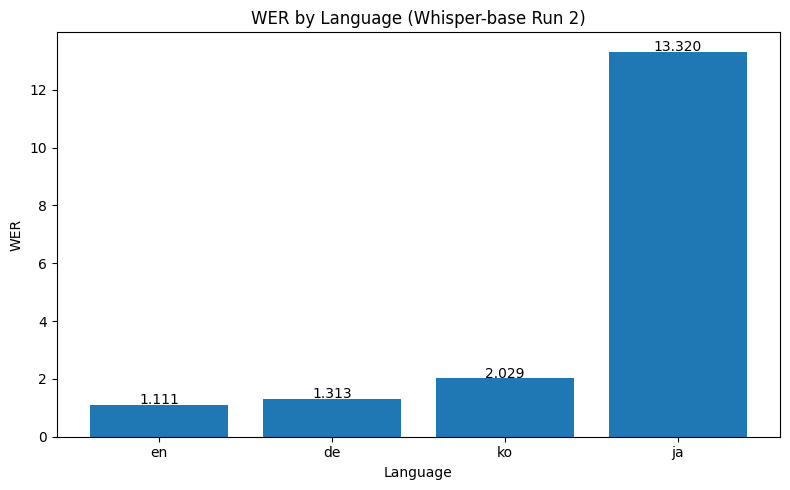

In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-base Run 2)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_base_run2.png")
plt.show()

  tiny	lr1	   lr2
- KO:	5.4171 ->	0.9673
- EN:	4.6523 ->	1.5566
- JA:	31.3300 -> 2.0200
- DE:	4.2576 ->	0.9953